In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [17]:
# Parameters 
STIMULUS_LABEL_SAVE_STRING = "pieman"

In [18]:


# 1) CSV Path for Continuous Embeddings
input_csv = "/Volumes/Passport/fmriprep/trait_ratings_data/filled_1pieman.csv"

# 2) Read into a DataFrame
df = pd.read_csv(input_csv)

# 3) If “bin_CJ” is the first column, we can just drop it (or set it as index)
#    Here, let’s drop it and keep only the 3072-dimensional embeddings:
emb_cols = [f"dim_{i}" for i in range(3072)]
embeddings = df[emb_cols].values     # shape will be (160, 3072)

# Quick sanity check:
print("Embeddings shape:", embeddings.shape)  # should print (160, 3072)

Embeddings shape: (160, 3072)


In [19]:
# Different way of getting the RDM using pdist and squareform:
cosine_dist_matrix = squareform(pdist(embeddings, metric='cosine'))
# Check shape:
assert cosine_dist_matrix.shape == (160, 160), "Cosine distance matrix should be of shape (160, 160)"


# Save as NumPy .npy
np.save(f"/Volumes/Passport/fmriprep/derivatives/personality_cos_sim_matrix/{STIMULUS_LABEL_SAVE_STRING}_spontaneous_cos_sim.npy", cosine_dist_matrix)

# Or save as CSV (if you need a human-readable form)
pd.DataFrame(cosine_dist_matrix).to_csv(f"/Volumes/Passport/fmriprep/derivatives/personality_cos_sim_matrix/{STIMULUS_LABEL_SAVE_STRING}_spontaneous_cos_sim.csv", 
                                       index=False)



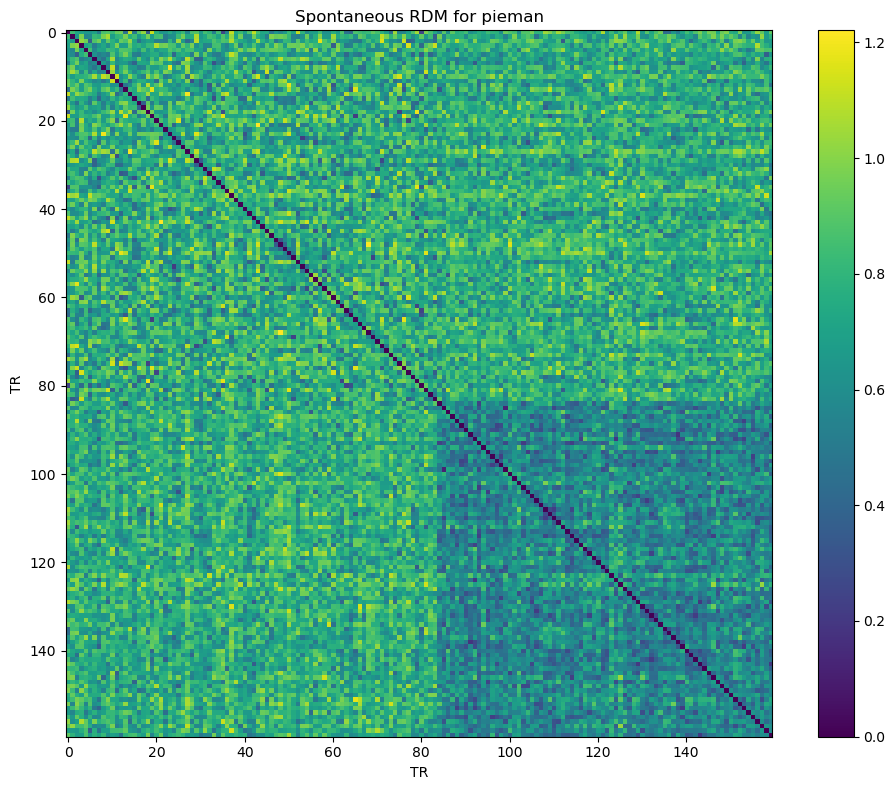

In [21]:
#plot it
plt.figure(figsize=(10, 8))
plt.imshow(cosine_dist_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(f"Spontaneous RDM for {STIMULUS_LABEL_SAVE_STRING}")
plt.xlabel("TR")
plt.ylabel("TR")
plt.tight_layout()
plt.savefig(f"/Volumes/Passport/fmriprep/derivatives/personality_cos_sim_matrix/{STIMULUS_LABEL_SAVE_STRING}_spontaneous_cos_RDM.png")
plt.show()


